# SK 하이닉스 지수에 대한 주식 시장 검증.

In [1]:
import yfinance as yf

# 한국 시장의 주요 종목 및 지수 티커
columns = ['^KS11', '005930.KS', '000660.KS']  # KOSPI, 삼성전자, SK하이닉스

# 데이터 다운로드
kf_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
kf_df = kf_df.rename(columns={'^KS11': 'KOSPI', '005930.KS': 'Samsung Electronics', '000660.KS': 'SK hynix Inc.'})

print(kf_df)

[*********************100%%**********************]  3 of 3 completed

Ticker      SK hynix Inc.  Samsung Electronics      KOSPI
Date                                                     
2010-01-04     20824.6387           12329.3398  1696.1400
2010-01-05     20176.5645           12527.4619  1690.6200
2010-01-06     21213.4805           12817.0205  1705.3199
2010-01-07     21083.8613           12390.3008  1683.4500
2010-01-08     21299.8848           12512.2168  1695.2600
...                   ...                  ...        ...
2024-06-04    193300.0000           75300.0000  2662.1001
2024-06-05    193700.0000           77400.0000  2689.5000
2024-06-07    207500.0000           77300.0000  2722.6699
2024-06-10    208000.0000           75700.0000  2701.1699
2024-06-11    212500.0000           75200.0000  2705.3201

[3558 rows x 3 columns]


In [2]:
kf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3558 entries, 2010-01-04 to 2024-06-11
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK hynix Inc.        3558 non-null   float64
 1   Samsung Electronics  3558 non-null   float64
 2   KOSPI                3556 non-null   float64
dtypes: float64(3)
memory usage: 111.2 KB


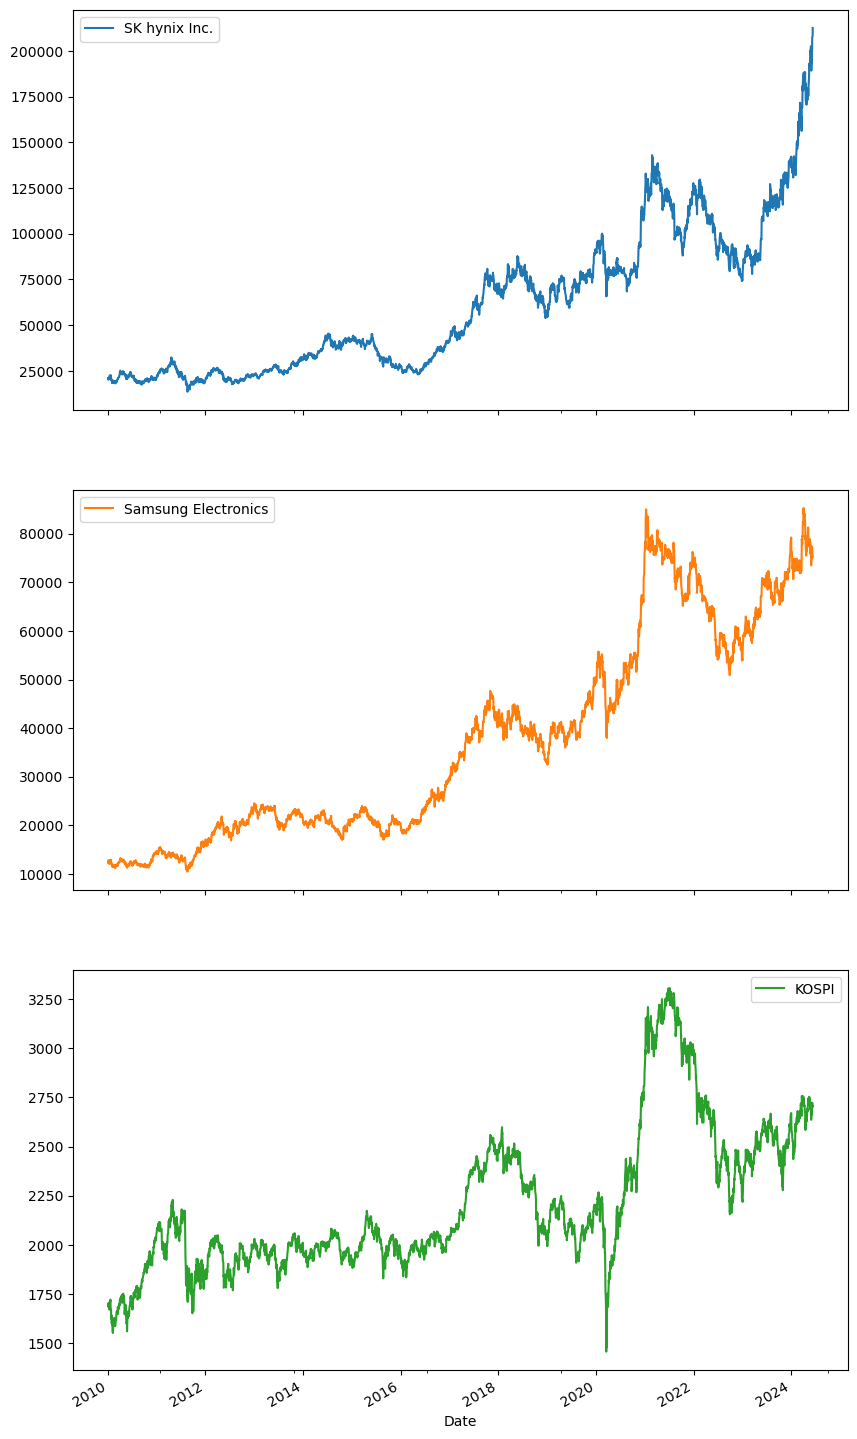

In [3]:
import matplotlib.pyplot as plt

kf_df.plot(figsize=(10, 20), subplots= True)
plt.show()

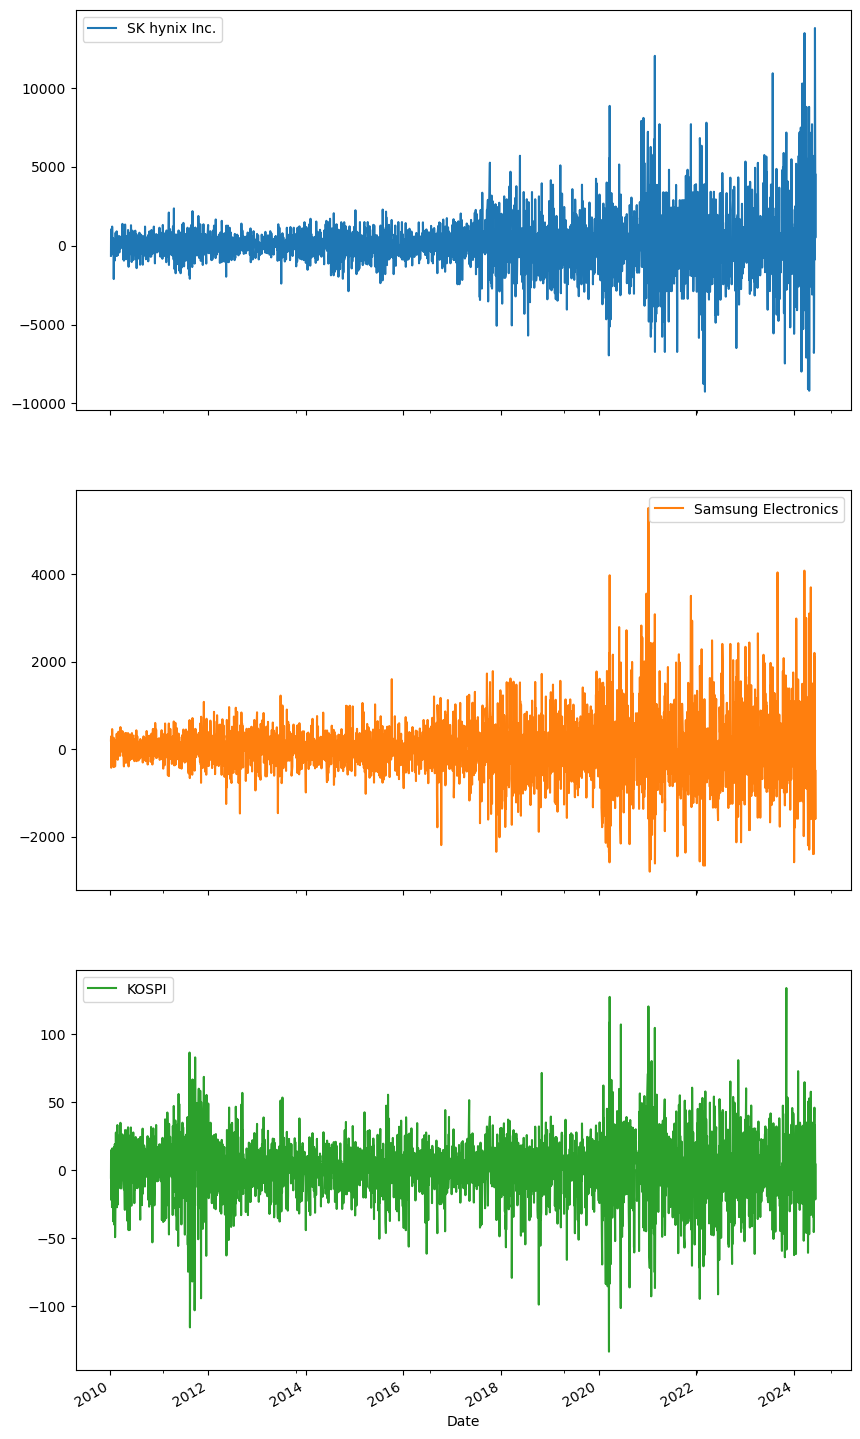

In [4]:
# 1차 차분 diff()
kf_df.diff().plot(figsize=(10, 20), subplots= True)
plt.show()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_47026/1246348809.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  kf_df.pct_change().mean().plot(kind='bar',figsize=(7,5), grid=True)


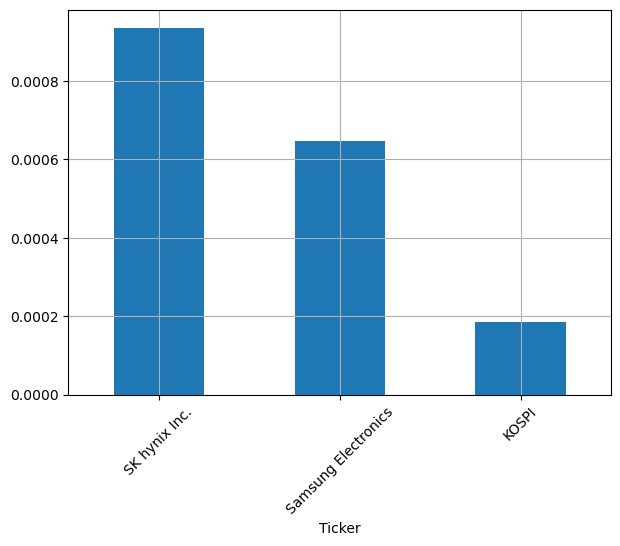

In [5]:
# 변화율 확인
kf_df.pct_change().mean().plot(kind='bar',figsize=(7,5), grid=True)

# x축 범례를 45도 기울이기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()


In [6]:
# 수익률을 구히기 위해 shift 를 사용해서 이동 시켜서 값을 확인 한다 
# (이유: 수익률 => 오늘 수익값 / 어제 수익값 * 100)
display(kf_df.shift(1).head(4))
display(kf_df.head(4))
display(kf_df.shift(-1).head(4))

Ticker,SK hynix Inc.,Samsung Electronics,KOSPI
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,20824.6387,12329.3398,1696.1400
2010-01-06,20176.5645,12527.4619,1690.6200
2010-01-07,21213.4805,12817.0205,1705.3199


Ticker,SK hynix Inc.,Samsung Electronics,KOSPI
Date,,,
2010-01-04,20824.6387,12329.3398,1696.1400
2010-01-05,20176.5645,12527.4619,1690.6200
2010-01-06,21213.4805,12817.0205,1705.3199
2010-01-07,21083.8613,12390.3008,1683.4500


Ticker,SK hynix Inc.,Samsung Electronics,KOSPI
Date,,,
2010-01-04,20176.5645,12527.4619,1690.6200
2010-01-05,21213.4805,12817.0205,1705.3199
2010-01-06,21083.8613,12390.3008,1683.4500
2010-01-07,21299.8848,12512.2168,1695.2600


In [7]:
import numpy as np

# 수익률 df
rate_kf_df = np.log(kf_df / kf_df.shift(1))
rate_kf_df

Ticker,SK hynix Inc.,Samsung Electronics,KOSPI
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,-0.031615,0.015941,-0.003260
2010-01-06,0.050115,0.022851,0.008657
2010-01-07,-0.006129,-0.033860,-0.012907
2010-01-08,0.010194,0.009792,0.006991
...,...,...,...
2024-06-04,-0.004645,-0.005298,-0.007641
2024-06-05,0.002067,0.027507,0.010240
2024-06-07,0.068821,-0.001293,0.012258


<Axes: xlabel='Date'>

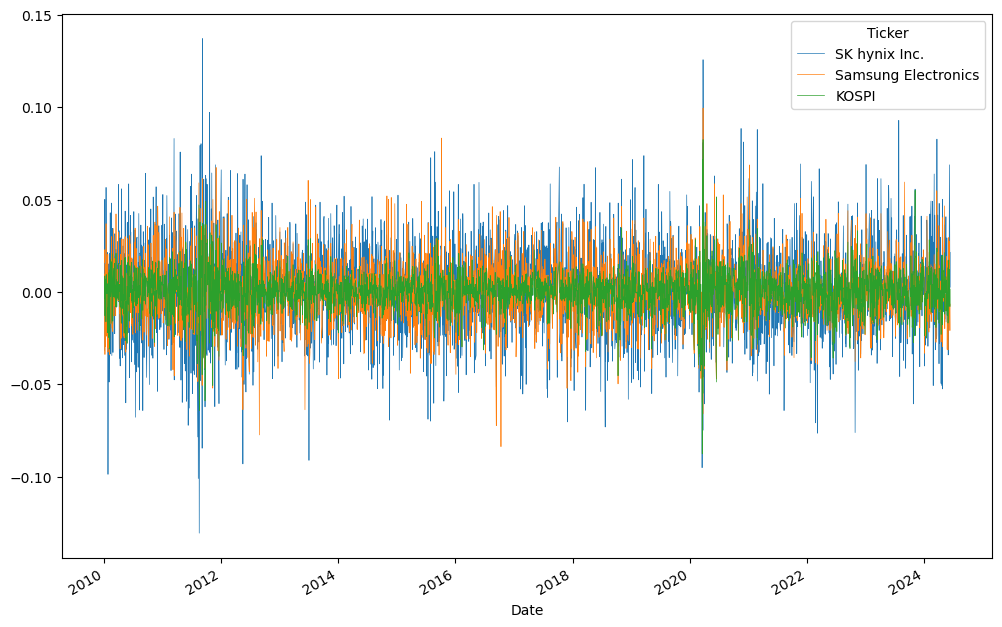

In [8]:
# 일간 수익률

rate_kf_df[['SK hynix Inc.', 'Samsung Electronics', 'KOSPI']].plot(figsize=(12, 8), lw=0.5 )

In [9]:
# 연율화
# 연간 영업일(약 252일로 계산)
# 252 = (통상적으로) 1년 영업률 

rate_kf_df.mean() * 252

Ticker
SK hynix Inc.          0.164562
Samsung Electronics    0.128102
KOSPI                  0.037908
dtype: float64

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif["vif_score"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif["feature"] = features.columns    
    return vif

In [11]:
rate_kf_df = rate_kf_df.dropna()
get_vif(rate_kf_df)

,vif_score,feature
0,1.524635,SK hynix Inc.
1,2.082875,Samsung Electronics
2,2.183306,KOSPI


array([[<Axes: title={'center': 'SK hynix Inc.'}>,
        <Axes: title={'center': 'Samsung Electronics'}>],
       [<Axes: title={'center': 'KOSPI'}>, <Axes: >]], dtype=object)

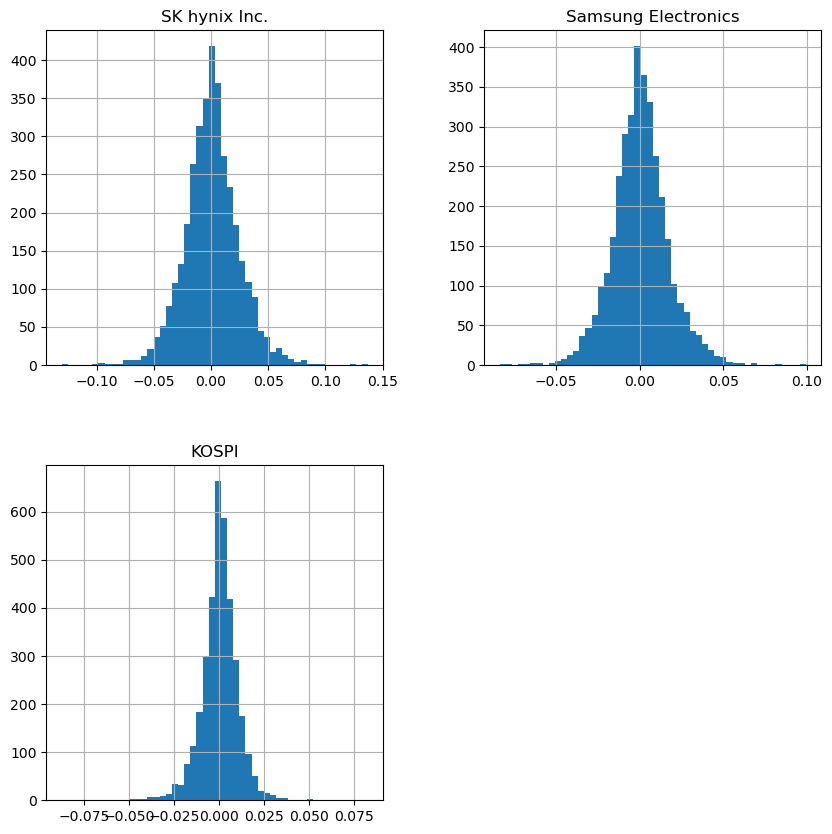

In [12]:
rate_kf_df.hist(figsize = (10, 10), bins=50 )

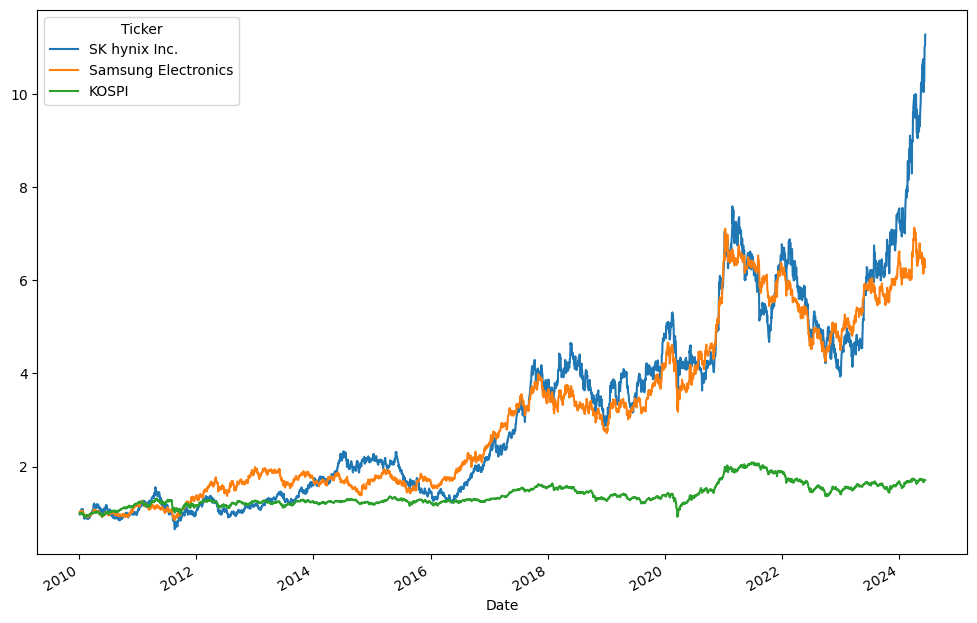

In [13]:
# 각 원소들의 누적합 : cumsum()
# 일간 수익률
rate_kf_df.cumsum().apply(np.exp).plot(figsize=(12, 8))
plt.show()

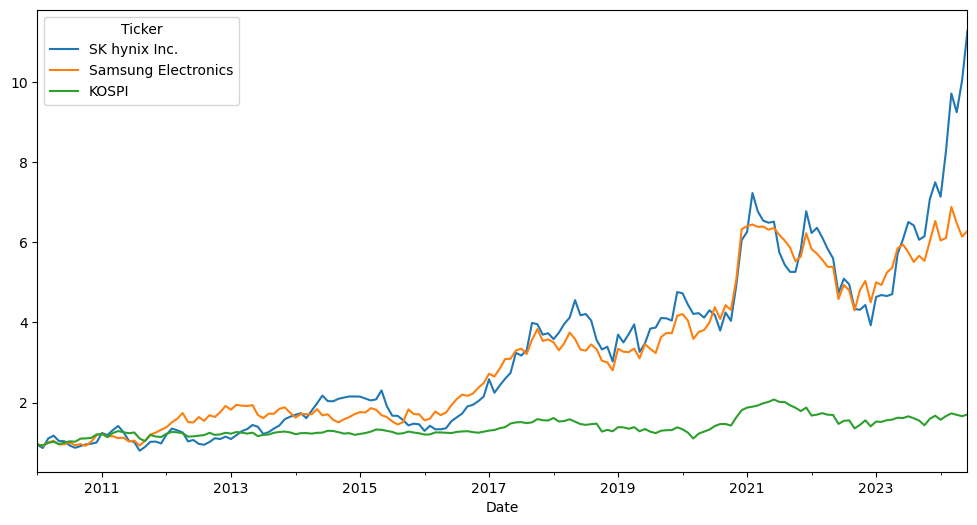

In [14]:
# 월간 수익률
rate_kf_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [15]:
sk_df = kf_df[['SK hynix Inc.']].dropna()
sk_df

Ticker,SK hynix Inc.
Date,
2010-01-04,20824.6387
2010-01-05,20176.5645
2010-01-06,21213.4805
2010-01-07,21083.8613
2010-01-08,21299.8848
...,...
2024-06-04,193300.0000
2024-06-05,193700.0000
2024-06-07,207500.0000


In [16]:
window = 20

sk_df['min'] = sk_df['SK hynix Inc.'].rolling(window=window).min()
sk_df['mean'] = sk_df['SK hynix Inc.'].rolling(window=window).mean()
sk_df['std'] = sk_df['SK hynix Inc.'].rolling(window=window).std()
sk_df['median'] = sk_df['SK hynix Inc.'].rolling(window=window).median()
sk_df['max'] = sk_df['SK hynix Inc.'].rolling(window=window).max()

sk_df = sk_df.dropna()
sk_df

Ticker,SK hynix Inc.,min,mean,std,median,max
Date,,,,,,
2010-01-29,19658.1055,19658.1055,21295.567005,940.412755,21148.67090,22552.8223
2010-02-01,19960.5430,19658.1055,21252.362220,982.111833,21148.67090,22552.8223
2010-02-02,19010.0410,19010.0410,21194.036045,1079.204245,21148.67090,22552.8223
2010-02-03,18405.1758,18405.1758,21053.620810,1246.299551,20932.64745,22552.8223
2010-02-04,18794.0176,18405.1758,20939.128625,1344.671978,20781.43360,22552.8223
...,...,...,...,...,...,...
2024-06-04,193300.0000,175400.0000,191110.000000,8447.665514,192500.00000,202500.0000
2024-06-05,193700.0000,175400.0000,191815.000000,8013.756265,193150.00000,202500.0000
2024-06-07,207500.0000,175400.0000,193290.000000,8051.930138,193500.00000,207500.0000


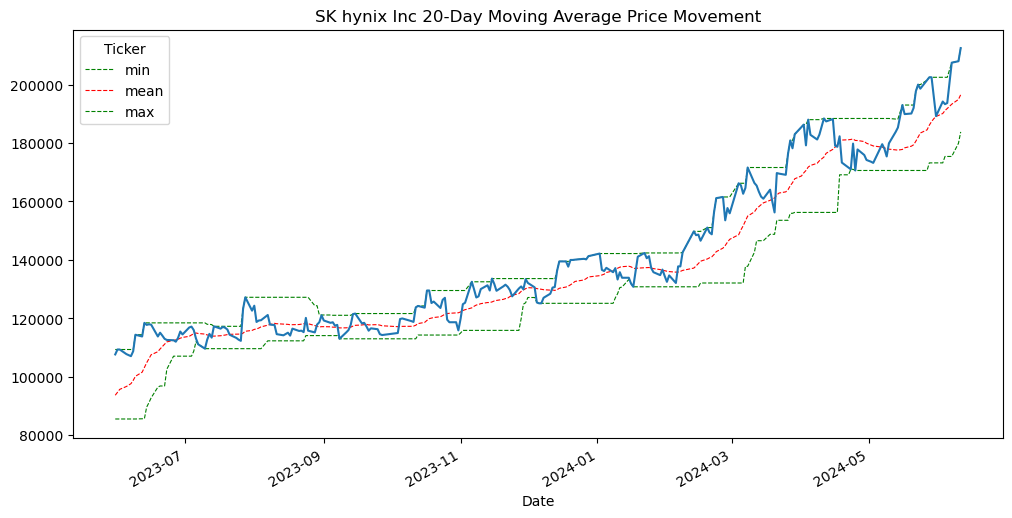

In [17]:
import matplotlib.pyplot as plt

ax = sk_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize= (12, 6), style=['g--','r--','g--'], lw=0.8)
sk_df['SK hynix Inc.'].iloc[-252:].plot(ax=ax)
plt.title("SK hynix Inc 20-Day Moving Average Price Movement")
plt.show()

In [18]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
sk_df['SMA1'] = sk_df['SK hynix Inc.'].rolling(window=21).mean() #short-term
# 장기
sk_df['SMA2'] = sk_df['SK hynix Inc.'].rolling(window=252).mean() #long-term

sk_df[['SK hynix Inc.', 'SMA1', 'SMA2']].tail()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_47026/2512968445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_df['SMA1'] = sk_df['SK hynix Inc.'].rolling(window=21).mean() #short-term
/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_47026/2512968445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_df['SMA2'] = sk_df['SK hynix Inc.'].rolling(window=252).mean() #long-term


Ticker,SK hynix Inc.,SMA1,SMA2
Date,,,
2024-06-04,193300.0,190257.142857,138849.155877
2024-06-05,193700.0,191233.333333,139233.575768
2024-06-07,207500.0,192561.904762,139649.947544
2024-06-10,208000.0,193990.476190,140045.886687
2024-06-11,212500.0,195757.142857,140455.356956


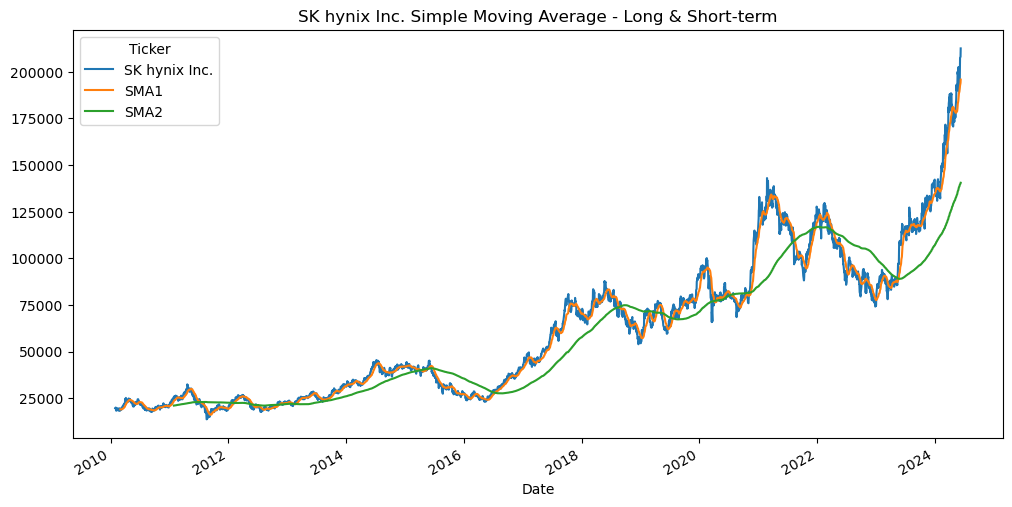

In [20]:
sk_df[['SK hynix Inc.', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("SK hynix Inc. Simple Moving Average - Long & Short-term")
plt.show()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_47026/3211844688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_df.dropna(inplace=True)
/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_47026/3211844688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_df['positions'] = np.where(sk_df['SMA1'] > sk_df['SMA2'], 1, -1)  # 1: buy , -1: sell /


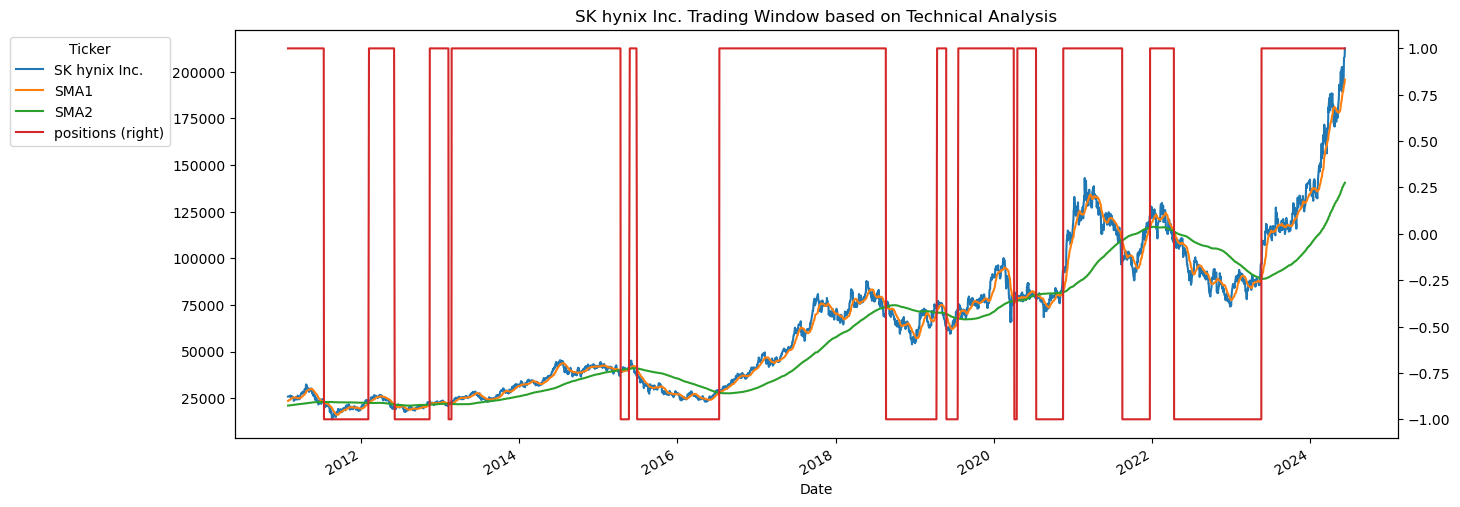

In [24]:
# sk 하이닉스 주가 기술 분석
# 골든 크로스, 데드 크로스 확인

sk_df.dropna(inplace=True)

sk_df['positions'] = np.where(sk_df['SMA1'] > sk_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = sk_df[['SK hynix Inc.', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("SK hynix Inc. Trading Window based on Technical Analysis")
plt.show()

In [26]:
skh_kf_df = kf_df[['SK hynix Inc.']].dropna()
skh_kf_df

Ticker,SK hynix Inc.
Date,
2010-01-04,20824.6387
2010-01-05,20176.5645
2010-01-06,21213.4805
2010-01-07,21083.8613
2010-01-08,21299.8848
...,...
2024-06-04,193300.0000
2024-06-05,193700.0000
2024-06-07,207500.0000


In [28]:
skh_kf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3558 entries, 2010-01-04 to 2024-06-11
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SK hynix Inc.  3558 non-null   float64
dtypes: float64(1)
memory usage: 184.6 KB


In [30]:
skh_kf_df['2023':]

Ticker,SK hynix Inc.
Date,
2023-01-02,74763.9609
2023-01-03,74665.1875
2023-01-04,79998.4219
2023-01-05,80393.4766
2023-01-06,82072.4531
...,...
2024-06-04,193300.0000
2024-06-05,193700.0000
2024-06-07,207500.0000


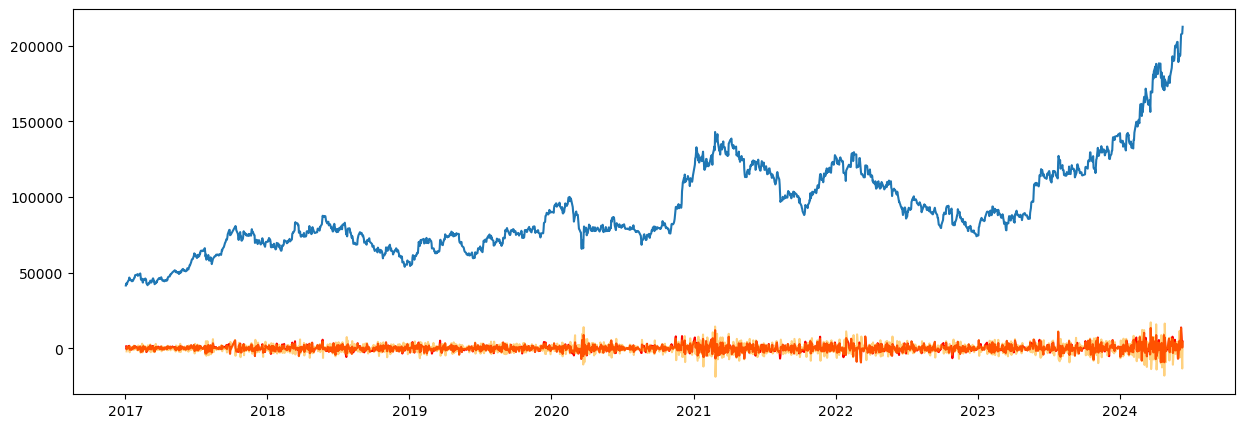

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# 차분 없이 원본 (비정상 시계열 데이터)
plt.plot(skh_kf_df['2017-01-01':].dropna())

# 1차 차분을 사용했을 때 데이터의 정상성을 확보할 수 있으며 필요시 추가적인 차분을 통해 정상성의 비율을 높일 수 있습니다.
plt.plot(skh_kf_df['2017-01-01':].diff().dropna(), c='red')

# diff().diff() 는 2차 차분을 진행함으로써 1차 차분을 진행했을 때보다 정상성의 분포가 더 튀는 것을 확인 할 수 있습니다. 
plt.plot(skh_kf_df['2017-01-01':].diff().diff().dropna(), c='orange', alpha=0.5)
plt.show()

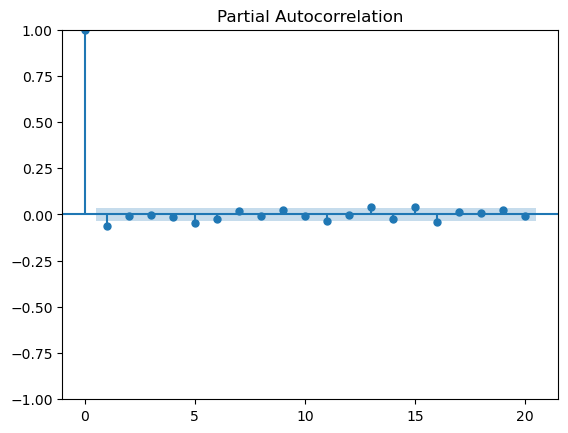

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 주식 데이터 프레임을 정상성있는 데이터 프레임으로 변경했기 때문에
# 부분자기상관함수를 사용하여 사분을 확인 (주식에 대한 데이터를 활용하기 때문에 서로 독립적인 데이터를 확인하는 \
# pacf를 사용)
plot_pacf(skh_kf_df.diff().dropna(), lags=20)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


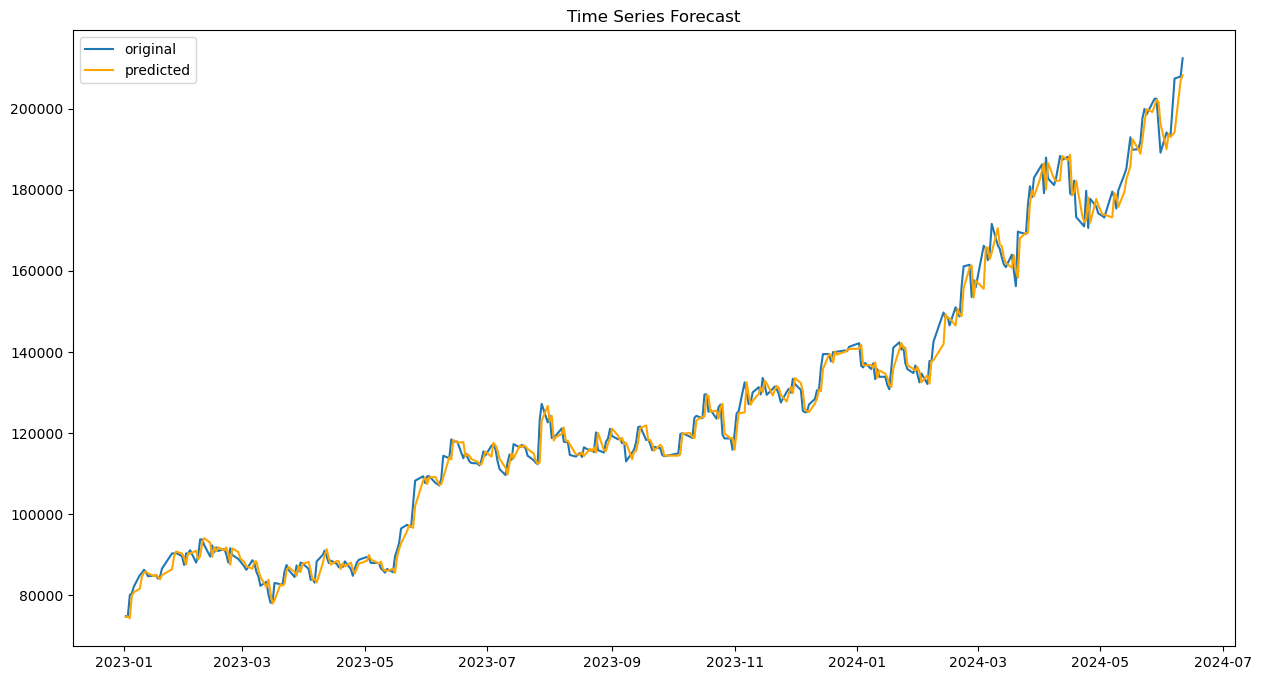

In [44]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(skh_kf_df, order=(4, 1, 21))
model_fit = model.fit()

start_index = pd.to_datetime('2023-01-02')
end_index = pd.to_datetime('2024-06-11')

# 이 부분은 추가적인 예측이 아니라 기존 실제 데이터에서 모델 평가를 하는 부분
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
# 실제 시계열 데이터
plt.plot(skh_kf_df['2023':], label='original')
# model을 훈련시켜서 나온 결과에 대한 모델 검증
plt.plot(forecast['2023':], label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 1, 1, 21
# Mean Squared Error 9538495.748194808
# Root Mean Squared Error 3088.4455229443192
# Mean Squared Error 0.0005317723668437251

# 4, 1, 21
# Mean Squared Error 9420265.801805707
# Root Mean Squared Error 3069.2451517931418
# Mean Squared Error 0.0005315007358947908

# 5, 1, 21
# Mean Squared Error 9434618.936519
# Root Mean Squared Error 3071.5824808262923
# Mean Squared Log Error 0.0005304333589473394

# 1, 2, 21
# Mean Squared Error 9465251.043650087
# Root Mean Squared Error 3076.5648121972154
# Mean Squared Log Error 0.000531431124339068

mse = mean_squared_error(skh_kf_df['2023-01-02':'2024-06-11'], forecast)
print("Mean Squared Error", mse)

mse = mean_squared_error(skh_kf_df['2023-01-02':'2024-06-11'], forecast)
print("Root Mean Squared Error", mse ** (1/2))

msle = mean_squared_log_error(skh_kf_df['2023-01-02':'2024-06-11'], forecast)
print("Mean Squared Log Error", msle)

Mean Squared Error 9420265.801805707
Root Mean Squared Error 3069.2451517931418
Mean Squared Log Error 0.0005315007358947908
